# Problem Statement
 To Predict the World Happiness score considering the other factors given in the dataset.

# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Identifying Features and Target

From the above dataset we have to predict the Happiness Score hence "Happiness Score" is our Target.
And the columns we need to predict the Happiness score are Economy(GDP per Capita),Family,Health(Life Expectancy),Freedom,Trust (Government Corruption) and Generocity.Hence we will take only these columns in consideration and will remove the remaining columns.


In [9]:
data = data.drop(columns=['Country','Region','Happiness Rank','Standard Error','Dystopia Residual'],axis = 1)

In [5]:
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [10]:
data.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [11]:
data.tail()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727
157,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681


# Checking for Null values

In [12]:
data.isnull().sum()

Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

It means there are no null values are present in the Dataset.

<AxesSubplot:>

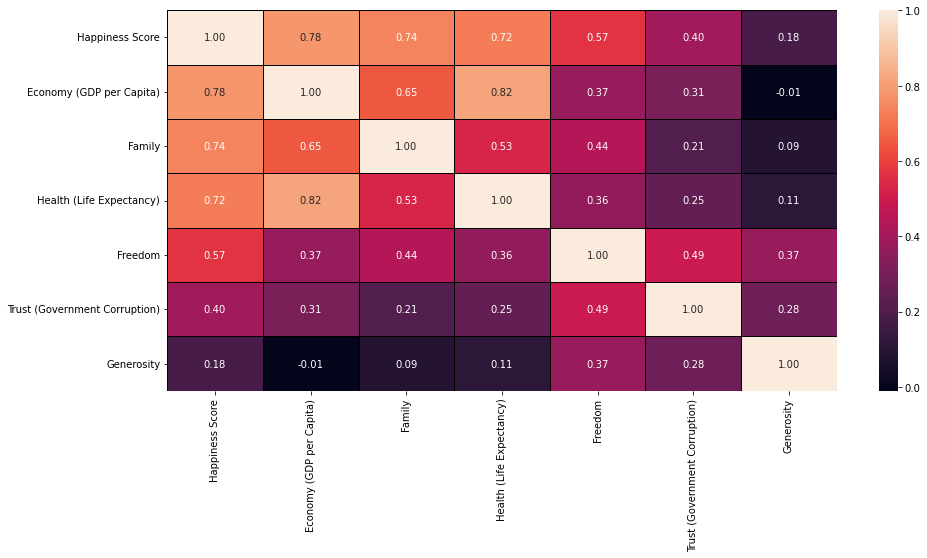

In [13]:
plt.figure(figsize=(15,7))

sns.heatmap(data.corr(),annot = True,linewidth ='0.5',linecolor='black',fmt='0.2f')

In [14]:
data.corr()['Happiness Score'].sort_values()

Generosity                       0.180319
Trust (Government Corruption)    0.395199
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

# Correlation Outcime

1. Generocity has 18% correlation with Happiness Score.
2. Trust(Government Corruption) has 39% correlation with Happiness Score.
3. Freedom has 56% correlation with Happiness Score.
4. Health(Life Expectancy) has 72% correlation with Happiness Score.
5. Family has 74% correlation with Happiness Score.
6. E hasconomy(GDP per Capita) has 78% correlation with Happiness Score.

# Splitting Data Into two parts

In [16]:
y = data['Happiness Score']
x = data.drop(columns=['Happiness Score'],axis = 1)

In [17]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [18]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [19]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)

In [20]:
X

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895
1,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198
2,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947
3,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983
4,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602
...,...,...,...,...,...,...
153,0.131376,0.551764,0.418083,0.883953,1.000000,0.284314
154,0.169573,0.252355,0.311241,0.723426,0.145132,0.229432
155,0.392329,0.338668,0.704150,0.234184,0.342556,0.592790
156,0.009051,0.296578,0.218444,0.176937,0.182312,0.247864


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=155465)

In [25]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_predict = model.predict(X_test)
y_predict

array([4.12117431, 4.63141224, 4.30021163, 2.97876971, 5.90311941,
       4.12271415, 7.25266693, 4.90120149, 4.67549402, 6.6484091 ,
       5.30252349, 5.613346  , 3.3268268 , 4.76315788, 6.29218591,
       5.18982679, 4.35977758, 5.86610681, 5.07587171, 4.71478534,
       4.76274058, 5.56826641, 4.36401209, 5.6083903 , 5.33909995,
       7.11543299, 5.83792942, 5.10492339, 5.71896574, 4.94286016,
       3.30443257, 5.38677646, 7.24037639, 6.13757817, 4.67199923,
       5.32547768, 5.41202943, 6.11505464, 4.94596948, 5.44534202,
       5.99709347, 4.31276253, 6.10253676, 6.09854238, 2.64747205,
       4.40564743, 7.07312283, 6.22752544])

In [29]:
print(model.coef_)

[1.5351171  2.05805425 1.09507947 0.72403578 0.57912896 0.14785527]


In [30]:
print(model.intercept_)

1.844949676921956


In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.6849994209465256

# Intepretation

R-Squared value 0.68499 proves that the model is a good model.
Means we successfully trained our model with certain predictors and estimated the World Happiness Score using Linear Regression.